<a href="https://colab.research.google.com/github/yohanesnuwara/reservoir-engineering/blob/master/Unit%2011%20Undersaturated-Oil%20Reservoirs/notebook/11_examples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Unit 11. Undersaturated-Oil Reservoirs**

In [78]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

## Example 11.1

Task 1. Calculate OOIP by neglected water and formation compressibilities

Task 2. Calculate OOIP by including water and formation compressibilities

In [3]:
# knowns
Boi = 1.484 # RB/STB
cf = 3E-6 # psi^-1
pi = 3000 # psia
pb = 1775 # psia
Rsi = 845 # scf/STB
cw = 3E-6 # psi^-1
swi = .25
temp = 150 # fahrenheit

# production data
p = np.array([3000, 2500])
Np = np.array([0, 33000]) # STB
Rp = np.array([0, 845]) # cumulative produced-gas/oil ratio, scf/STB
Bo = np.array([1.484, 1.490]) # RB/STB
Rs = np.array([845, 845]) # scf/STB

data = pd.DataFrame({'p': p, 'Np': Np, 'Rp': Rp, 'Bo': Bo, 'Rs': Rs})
data

,p,Np,Rp,Bo,Rs
0,3000,0,0,1.484,845
1,2500,33000,845,1.490,845


In [14]:
# Task 1. calculate OOIP by neglecting water and formation compressibility

F = Np[-1] * Bo[-1]
Eo = Bo[-1] - Bo[0]

Nfoi1 = F / Eo
print('Original Oil in Place by neglecting water and formation compressibility:', Nfoi1, 'STB')

Original Oil in Place by neglecting water and formation compressibility: 8194999.999999993 STB


In [18]:
# Task 2. calculate OOIP by including water and formation compressibility

F = Np[-1] * Bo[-1]
Eo = Bo[-1] - Bo[0]
Efw = ((cf + (cw * swi)) / (1 - swi)) * (p[0] - p[-1])
Eo_Boi_Efw = Eo + Bo[0] * Efw

Nfoi2 = F / Eo_Boi_Efw
print('Original Oil in Place by including water and formation compressibility:', Nfoi2, 'STB')

print('OOIP by neglecting compressibilities has overestimated', np.round(((Nfoi1 - Nfoi2) * 100 / Nfoi2), 2), '% compared to OOIP calculation including compressibilities')

Original Oil in Place by including water and formation compressibility: 5063851.699279091 STB
OOIP by neglecting compressibilities has overestimated 61.83 % compared to OOIP calculation including compressibilities


## Example 11.2

Task 1. Calculate OOIP and OGIP, use plot $F$ vs $E_o+B_{oi}E_{fw}$

In [63]:
# knowns
Bob = 1.56 # oil FVF at bubblepoint, RB/STB
Boi = 1.532 # RB/STB
Rsi = 900 # scf/STB
cob = 21E-5 # oil compressibility at bubblepoint, psi^-1
cf = 3E-6 # psi^-1
cw = 4E-6 # psi^-1
pi = 3115 # psia
pb = 2255 # psia
swi = .25

# production data
# during production, the bubblepoint pressure has been exceeded in Sept 1944
date = np.array([np.datetime64('1941-01'), np.datetime64('1942-04'), np.datetime64('1942-08'), np.datetime64('1944-09'), np.datetime64('1945-12'), np.datetime64('1947-01')])
p = np.array([3115, 2565, 2255, 2055, 1680, 1150])
Np = np.array([0, 65, 100, 375, 575, 715]) * 1000 # STB
Gp = np.array([0, 67, 105, 370, 800, 1600]) # MMscf
Bt = np.array([1.5320, 1.55, 1.56, 1.62445, 1.80715, 2.35585]) # RB/STB
Bg_inv = np.array([np.nan, 180, 156, 141, 113.5, 74]) # scf/res ft3

status = []
for i in range(len(p)):
  if p[i] >= pb:
    _ = 'above bubble'
  if p[i] < pb:
    _ = 'below bubble'
  status.append(_)

data = pd.DataFrame({'date': date, 'p': p, 'Np': Np, 'Gp': Gp, 'Bt': Bt, '1/Bg': Bg_inv, 'status': status})

# conversion
Gp = Gp * 1E+6 # MMscf to scf
Bg_inv = Bg_inv / 0.178108 # scf/res ft3 to scf/res bbl
Bg = 1 / Bg_inv # res bbl/scf

data

,date,p,Np,Gp,Bt,1/Bg,status
0,1941-01-01,3115,0,0,1.53200,NaN,above bubble
1,1942-04-01,2565,65000,67,1.55000,180.0,above bubble
2,1942-08-01,2255,100000,105,1.56000,156.0,above bubble
3,1944-09-01,2055,375000,370,1.62445,141.0,below bubble
4,1945-12-01,1680,575000,800,1.80715,113.5,below bubble
5,1947-01-01,1150,715000,1600,2.35585,74.0,below bubble


In this Example 11.2, a formula is given to calculate the $B_{to}$ at pressure below bubblepoint. Originally, $B_{to}$ is calculated using Equation 11.8, but because the $R_s$ data is not known, so the formula is used.

Above bubblepoint, Equation 11.8 reduces to:

$$B_{to}=B_{t}$$

Because $R_{s}$ = $R_{si}$, therefore $B_g(R_{si}-R_s)=0$

In [73]:
pi = p[0]
Bti = Bt[0]
Bto_above = Bt # Eq 11.8, term (Bg*(Rsi-Rs)) is 0 at pressure above bubblepoint (Rs=Rsi)
Bto_below = Bob * (((pb - p) / ((1.282 * p) + (.000523 * (p**2)))) + 1) # formula given within the Example

Bto = []
for i in range(len(p)):
  if p[i] >= pb:
    Bto_ = Bt[i]
  if p[i] < pb:
    Bto_ = Bob * (((pb - p[i]) / ((1.282 * p[i]) + (.000523 * (p[i]**2)))) + 1)
  Bto.append(Bto_) 

Efw = ((cf + (cw * swi)) / (1 - swi)) * (pi - p)
Eo = Bto - Bti

Eo_Bti_Efw = Eo + Bti * Efw

F = (Np * (Bto - Rsi * Bg)) + (Gp * Bg)

N = F / Eo_Bti_Efw

params = pd.DataFrame({'p': p, 'F': F, 'Eo+(Bti*Efw)': Eo_Bti_Efw, 'N': N})
params

,p,F,Eo+(Bti*Efw),N
0,3115,NaN,0.000000,NaN
1,2565,1.091607e+05,0.022494,4.852908e+06
2,2255,1.731258e+05,0.035027,4.942670e+06
3,2055,6.502111e+05,0.101082,6.432526e+06
4,1680,1.482400e+06,0.286841,5.168023e+06
5,1150,3.986604e+06,0.839912,4.746453e+06


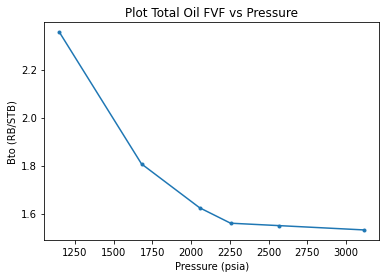

In [76]:
# plot Bto vs pressure
plt.plot(p, Bto, '.-')
plt.title('Plot Total Oil FVF vs Pressure')
plt.xlabel('Pressure (psia)'); plt.ylabel('Bto (RB/STB)')
plt.show()

Plot 11.1

OOIP using Plot 11.1 material balance: 4811739.154572299 STB


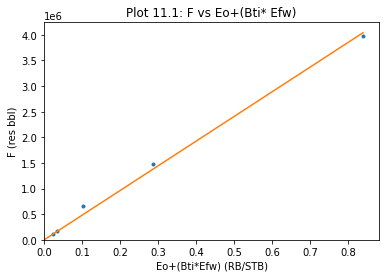

In [92]:
# plot 11.1 and regression to calculate OOIP

def linear(x, a):
  # a: slope
  y = a * x 
  return(y)

popt, pcov = curve_fit(linear, Eo_Bti_Efw[1:], F[1:])
print('OOIP using Plot 11.1 material balance:', popt[0], 'STB')

y = Eo_Bti_Efw * popt[0]

plt.plot(Eo_Bti_Efw, F, '.')
plt.plot(Eo_Bti_Efw, y)
plt.title('Plot 11.1: F vs Eo+(Bti* Efw)')
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.xlabel('Eo+(Bti*Efw) (RB/STB)'); plt.ylabel('F (res bbl)')
plt.show()

Plot 11.2: Waterdrive Diagnostic Plot

OOIP using Plot 11.2 material balance: 5207192.68980829 STB


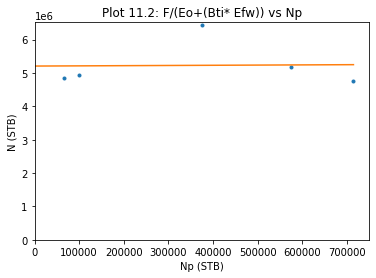

In [91]:
# plot 11.2 and regression to calculate OOIP

def linear(x, a, b):
  # a: slope
  # b: intercept
  y = a * x + b
  return(y)

popt, pcov = curve_fit(linear, Np[1:], N[1:])
print('OOIP using Plot 11.2 material balance:', popt[1], 'STB')

y = Np * popt[0] + popt[1]

plt.plot(Np, N, '.')
plt.plot(Np, y)
plt.title('Plot 11.2: F/(Eo+(Bti* Efw)) vs Np')
plt.xlim(xmin=0); plt.ylim(ymin=0)
plt.xlabel('Np (STB)'); plt.ylabel('N (STB)')
plt.show()